![title](../common/logo_DH.png)

# WORKSHOP 3
---
## GRUPO 8

Integrantes: 

<a id="tabla_contenidos"></a> 
## Tabla de Contenidos

### <a href='#section_repaso'>1. Introducción</a>
- #### <a href='#explicacion_dataset'>1.1 Presentación del caso</a>
- #### <a href='#metodologia'>1.2 La metodología de trabajo</a>

### <a href='#section_import_lib'>2. Importación de librerías para casos de Clasificación</a>


### <a href='#importar_dataset'>3. Importando el DataSet</a> 
- #### <a href='#imputacion'>3.1 Imputación de datos</a>

### <a  href='#preparacion_entrenamiento'>4. Preparación y Entrenamiento del DataSet</a>
- #### <a href='#features'>4.1 Features y dummies</a>
- #### <a href='#split'>4.2 Split del set de entrenamiento</a>
- #### <a href='#metodo_entrenamiento'>4.3 Selección del método de entrenamiento</a>

### <a  href='#evaluacion_modelos'>5. Evaluación de los Modelos</a>
- #### <a href='#section_matriz_confusion_code'>5.1 Métricas: Matriz de confusión</a>
- #### <a href='#section_accuracy'>5.2 Métricas: Accuracy</a>
- #### <a href='#section_error'>5.3 Métricas: Error de Clasificación</a>
- #### <a href='#section_recall'>5.4 Métricas: Sensitivity (o recall)</a>
- #### <a href='#section_specificity'>5.5 Métricas: Specificity</a>
- #### <a href='#section_precision'>5.6 Métricas: Precision</a>
- #### <a href='#section_fpr'>5.7 Métricas: False positive rate (FPR)</a>
- #### <a href='#section_f1_score'>5.8 Métricas: F1-Score</a>

### <a href='#section_curva_roc'>6. Curva ROC</a>
- #### <a href='#section_umbrales'>6.1 Ajustando los umbrales</a>
- #### <a href='#section_imp_croc'>6.2 Implementación Curva ROC y AUC</a>

### <a href='#conclusiones'>7. Conclusuiones</a>
---

<a id="section_repaso"></a> 
## 1. Introducción
---

<a id="explicacion_dataset"></a> 
### 1.1 Presentación del caso
Aerolineas Argentinas SA, nos ha proporcionado una base de datos de los provedores del Laboratorio de Calibraciones que se encuentra en Ezeiza.

Este laboratorio se encarga en poner en condición serviciable todas las herramientas metrologadas, para el uso en la reparación de las aeronaves. Tiene un flujo de herraminetas interno y un flujo de herraminetas que se calibran en laboratorios externos.

Este entrenamiento y evaluación de los datos, pretende determinar y clasificar a los provedores que van a entregar en tiempo y forma las herramientas. El tiempo de calibración que nos proponen, es que las herramientas están dentro de los plazos permitidos de 2 meses como máximo. El retorno de una herramienta que supere este límite es antieconómica, ya que los períodos de calibraciones son de 1 año, y cuanto más tarden en retornar, menos tiempo tiene para su uso operativo.

<a id="metodologia"></a> 
### 1.2 La metodología de trabajo
Se hará una imputación y limpieza de los datos. Una vez realizado eso, se utilizarán diferentes métodos de clasificación, para comparar los resultados y decidirse por el mejor método para clasificar.


<a id="section_import_lib"></a>
## 2. Importación de librerías para casos de Clasificación
---

Comenzamos importando las librerías y dependencias que utilizaremos a lo largo del trabajo.

In [1]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegressionCV,  LogisticRegression
from sklearn.preprocessing import StandardScaler, binarize
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, roc_curve, auc

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
ruta_tat = '../data/VENDROS_TAT.csv'
ruta_vendors = '../data/VENDORS_NAMES_metrics.csv'

data_tat = pd.read_csv(ruta_tat, encoding='UTF-8', sep=',')
data_vendors = pd.read_csv(ruta_vendors, encoding='UTF-8', sep=',')

C:\Users\ezelo\AppData\Local\Temp\ipykernel_14824\389539453.py:4: DtypeWarning: Columns (70) have mixed types. Specify dtype option on import or set low_memory=False.
  data_tat = pd.read_csv(ruta_tat, encoding='UTF-8', sep=',')


Visalizamos el DataSet para identificar las columnas y los valores que necesitamos.

In [3]:
data_tat.sample(5)

,TAT,TAT7,TAT6,TAT5,TAT4,TAT3,TAT2,TAT1,order_number_id,order_number,...,EIN_arrival_date,EIN_arrival_date_tz,EIN_part_tool,EIN_created_date,EIN_created_date_tz,EIN_airway_bill_date,EIN_airway_bill_date_tz,new_PARTNO,new_DESCRIPTION,new_STATUS
1487,15.0,NaN,NaN,15.0,15.0,NaN,NaN,0.0,150369,R1753620,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YA 120,REGLA,0
6643,91.0,NaN,NaN,9.0,9.0,NaN,NaN,91.0,76941,R1304119,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,436,MICROMETRO,0
11302,4.0,NaN,NaN,4.0,4.0,NaN,NaN,0.0,220873,R3005722,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30EX,CALIBRE DE PROFUNDIDAD,0
6493,157.0,NaN,NaN,157.0,157.0,NaN,NaN,1.0,84737,R1840019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30006-0035,DINAMOMETRO,0
710,43.0,NaN,NaN,11.0,11.0,43.0,38.0,0.0,166314,R1002321,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01-0597-00,AC FUEL CAPACITANCE TEST SET,0


In [4]:
data_tat.dtypes

TAT                        float64
TAT7                       float64
TAT6                       float64
TAT5                       float64
TAT4                       float64
                            ...   
EIN_airway_bill_date        object
EIN_airway_bill_date_tz     object
new_PARTNO                  object
new_DESCRIPTION             object
new_STATUS                   int64
Length: 94, dtype: object

In [5]:
data_tat.shape

(14955, 94)

<a id="imputacion"></a> 
### 3.1 Imputación de datos

En este apartado se realiza un análisis manual del estado del DataSet, para verificar de manera preliminar, el estado  de la base de datos que vamos a utilizar.

Para eso identificaremos la cantidad de **Nulos**.

In [6]:
data_null = data_tat.apply(lambda x: x.isnull().sum()/data_tat.shape[0], axis=0)
data_null

TAT                        0.001003
TAT7                       0.605082
TAT6                       0.791174
TAT5                       0.203076
TAT4                       0.203076
                             ...   
EIN_airway_bill_date       0.605082
EIN_airway_bill_date_tz    0.605082
new_PARTNO                 0.000000
new_DESCRIPTION            0.000000
new_STATUS                 0.000000
Length: 94, dtype: float64

Tenemos un total de **91 columnas**. Realizaremos una eliminación de las **columnas nulas** del DataSet, con la función *dropna(how='all',  axis=1)*

In [7]:
data_tat.dropna(how='all', axis=1)

,TAT,TAT7,TAT6,TAT5,TAT4,TAT3,TAT2,TAT1,order_number_id,order_number,...,EIN_arrival_date,EIN_arrival_date_tz,EIN_part_tool,EIN_created_date,EIN_created_date_tz,EIN_airway_bill_date,EIN_airway_bill_date_tz,new_PARTNO,new_DESCRIPTION,new_STATUS
0,12.0,12.0,12.0,NaN,NaN,NaN,NaN,NaN,47613,R0017144TRF,...,2018-09-13 00:00:00,+00:00,Y,2018-09-13 00:00:00,+00:00,2018-09-12 00:00:00,+00:00,879B,LCR METER,0
1,33.0,NaN,NaN,33.0,33.0,NaN,NaN,5.0,62347,R0285318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AP-2703,DINAMOMETRO,0
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,67713,R0667118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L10,DINAMOMETRO,0
3,18.0,NaN,NaN,12.0,12.0,NaN,NaN,18.0,74221,R1102719,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3277705.,DINAMOMETRO,0
4,6.0,NaN,NaN,6.0,6.0,NaN,NaN,0.0,76276,R1251719,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7034-5,COMPARADOR,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14950,37.0,NaN,NaN,37.0,37.0,NaN,NaN,0.0,221104,R3023322,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33-215,CINTA METRICA DE 3.5 MTS/12,0
14951,6.0,NaN,NaN,6.0,6.0,NaN,NaN,0.0,222035,R3095022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4000 KG,DINAMOMETRO,0
14952,3.0,NaN,NaN,3.0,3.0,NaN,NaN,0.0,227645,R0259923,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.800IN,MICROMETRO DE INTERIOR AXIAL,0
14953,8.0,NaN,NaN,8.0,8.0,7.0,4.0,0.0,229035,R0369923,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M22520/1-01,MANDRILADORA PINES DANIELS,0


Después de haber tenido una reunón con los proveedores de la base de datos para realizar este análisis, se pudieron determinar las columnas que podrían ser influyentes para realizar predicciones. Y se descartaron aquellas que no tienen relevancia en el asunto.

En este punto tomaremos solamente las columnas Categoricas o numéricas que pueden aportar al objetivo de clasificación que queremos realizar. Para eso crearemos  un nuevo DataFrame con un **filtro de columnas**.

In [8]:
data_tat_filter = data_tat[[
    'TAT',
    'new_PARTNO',
    'new_DESCRIPTION',
    'order_number_id',
    'order_number',
    'order_type',
    'order_date',
    'address_ship',
    'vendor_code',
    'shipment',
    'priority',
    'created_date',
    'od_confirmed_date',
    'od_req_condition']]

In [9]:
data_tat_filter.head(5)

,TAT,new_PARTNO,new_DESCRIPTION,order_number_id,order_number,order_type,order_date,address_ship,vendor_code,shipment,priority,created_date,od_confirmed_date,od_req_condition
0,12.0,879B,LCR METER,47613,R0017144TRF,R,2018-08-08 00:00:00,AEP,0NUU5,NaN,NaN,2018-08-31 00:00:00,0,NaN
1,33.0,AP-2703,DINAMOMETRO,62347,R0285318,R,2018-10-03 00:00:00,ARG,AR0011,NaN,RTN,2018-10-03 00:00:00,0,CA
2,4.0,L10,DINAMOMETRO,67713,R0667118,R,2018-11-12 00:00:00,ARG,AR0011,NaN,RTN,2018-11-12 00:00:00,0,CA
3,18.0,3277705.,DINAMOMETRO,74221,R1102719,R,2019-01-07 00:00:00,ARG,AR0011,NaN,RTN,2019-01-05 00:00:00,0,CA
4,6.0,7034-5,COMPARADOR,76276,R1251719,R,2019-01-21 00:00:00,ARG,AR0011,NaN,RTN,2019-01-19 00:00:00,0,CA


In [10]:
data_tat_filter.shape[1]

14

Pasamos de tener 91 columnas en nuestro DataSet original, a pasar a **14 columnas** finales.

Una vez imputado todos los datos de los TAT vamos **identificar los vendors** desde otro DataSet llamado "data_vendors" que identifica a los Vendors con un codigo, su nombre y datos estadisticos preliminares.

Con ese dato podemos incorporar los nombres de los provedores de una manera más amigable. Creamos un nuevo DataSet con los nombres de los vendors.

In [11]:
data_vendors.head(5)

,vendor_name,vendor_code,COUNT,MEAN_of_TAT,STDEV_of_TAT
0,"BERNOULLI AEROSPACE, LLC",US0942,1061,73.393968,96.565499
1,DASTEC SRL USA LLC,US0192,1,33.000000,NaN
2,EDACI S.R.L.,AR0310,444,45.380631,58.214414
3,DANIELS MANUFACTURING CORP.,11851,9,58.333333,45.634417
4,SCHENCK ROTEC GMBH,CE619,1,193.000000,NaN


Nos quedamos con las dos columnas de **'vendro_name'** y **'vendor_code'** y dropeamos el resto.

In [12]:
data_vendors_filtrado = data_vendors.drop(['COUNT','MEAN_of_TAT','STDEV_of_TAT'], axis=1)

Realizamos un **merge** con los nombres.

In [13]:
ds_complete = data_tat_filter.merge(data_vendors_filtrado, how='left', on='vendor_code')
ds_complete.sample(3)

,TAT,new_PARTNO,new_DESCRIPTION,order_number_id,order_number,order_type,order_date,address_ship,vendor_code,shipment,priority,created_date,od_confirmed_date,od_req_condition,vendor_name
14795,24.0,TK4150,MANDRILADORA TERMIN.,198971,R1345522,R,2022-05-30 00:00:00,ADUANA-EZE,7VKY4,F3,RTN,2022-05-30 00:00:00,2022-06-23 00:00:00,CA,AVC LABORATORY
13349,155.0,D-5820P,GAUSSIMETRO,143168,R1234420,R,2020-07-14 00:00:00,ADUANA-AEP,US0954,F6,RTN,2020-07-14 00:00:00,0,CA,ALPHA & OMEGA CALIBRATION SERVICES
530,16.0,A3Q,COMPARADOR,119623,R4336219,R,2019-11-06 00:00:00,AR0650,AR0011,NaN,RTN,2019-11-06 00:00:00,2020-01-12 00:00:00,CA,RUBEN HUGO COPPOLA E HIJOS SRL


In [14]:
ds_complete.rename(columns={'new_PARTNO':'part_number','new_DESCRIPTION':'description'}, inplace=True)

Finalmente tenemos el DataSet agrupado.

Ahora necesitamos realizar una limpieza de los **valores nulos** en nuestras columnas de interes.

Primero identificaremos la  proporción de nulos en cada una. Y después identificar el tipo de columnas que tenemos.

In [15]:
ds_complete.apply(lambda x: x.isnull().sum()/data_tat_filter.shape[0], axis=0)

TAT                  0.001003
part_number          0.000000
description          0.000000
order_number_id      0.000000
order_number         0.000000
order_type           0.000000
order_date           0.000000
address_ship         0.006954
vendor_code          0.000000
shipment             0.528118
priority             0.031695
created_date         0.000000
od_confirmed_date    0.000000
od_req_condition     0.019525
vendor_name          0.000669
dtype: float64

In [16]:
ds_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14955 entries, 0 to 14954
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TAT                14940 non-null  float64
 1   part_number        14955 non-null  object 
 2   description        14955 non-null  object 
 3   order_number_id    14955 non-null  int64  
 4   order_number       14955 non-null  object 
 5   order_type         14955 non-null  object 
 6   order_date         14955 non-null  object 
 7   address_ship       14851 non-null  object 
 8   vendor_code        14955 non-null  object 
 9   shipment           7057 non-null   object 
 10  priority           14481 non-null  object 
 11  created_date       14955 non-null  object 
 12  od_confirmed_date  14955 non-null  object 
 13  od_req_condition   14663 non-null  object 
 14  vendor_name        14945 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 1.8+ MB


Las columnas más comprometidas en la proporción de nulos son **'TAT'** (por su relevancia en la predicción de datos), **'entry_date'**, **'address_ship'**, **'shipment'**, **'priority'**, **'od_req_condition'** y **'vendor_name'**.

Ahora lo que necesitamos es completar los nulos de las columnas.
* TAT: Completaremos los nulos de los datos con el valor medio de los datos.
* Shipment: Los valores nulos los completaremos con '--'.
* Priority: Los valores nulos los completaremos con '--'.
* Address_ship: Los valores nulos colocaresmo ARG.
* Od_req_condition: Los valores nulos los remplazaremos por la condición 'CA', de calibración, ya que son todas herramientas calibradas.


In [17]:
ds_complete['TAT'].fillna(ds_complete.TAT.mean(), inplace=True)
ds_complete.TAT.isnull().sum()

0

In [18]:
ds_complete['shipment'].unique()

array([nan, 'F3', 'F6', '--', 'F5', 'UP', 'F2', 'F1', 'AT', 'FF', 'Z2',
       'Z1'], dtype=object)

In [19]:
ds_complete['shipment'].fillna('--', inplace=True)
ds_complete['shipment'].isnull().sum()

0

In [20]:
ds_complete['priority'].unique()

array([nan, 'RTN', 'USR', 'AOG', 'WSP'], dtype=object)

In [21]:
ds_complete['priority'].fillna('--', inplace=True)
ds_complete['priority'].isnull().sum()

0

In [22]:
ds_complete['address_ship'].unique()

array(['AEP', 'ARG', 'ADUANA-EZE', 'AR0650', 'ADUANA-AEP', 'AR-REC',
       'EZE', 'AUT', '062W2', nan, 'AR-METROLOGY', '3F4Z0', 'AR-ORDERING',
       'NL0008', 'DE0203', '09AQ0', '81205', 'MIA-LOG', 'AU-REC',
       'AU-ORDERING', 'US0202', 'EXP-EZE', 'AR-INVOICE'], dtype=object)

In [23]:
ds_complete['address_ship'].fillna('ARG', inplace=True)
ds_complete['address_ship'].isnull().sum()

0

In [24]:
ds_complete['od_req_condition'].unique()

array([nan, 'CA', 'N', 'R', 'US', 'S', 'T', 'RT', 'SV', 'SC'],
      dtype=object)

In [25]:
ds_complete['od_req_condition'].fillna('CA', inplace=True)
ds_complete['od_req_condition'].isnull().sum()

0

Ahora necesitamos transformar los **valores de tiempo** en valores numéricos, para poder evaluarlos correctamente.

In [26]:
ds_complete['order_date'] = ds_complete['order_date'].apply(lambda x: pd.to_datetime(x))
ds_complete['order_date_year'] = ds_complete['order_date'].apply(lambda x: x.year)
ds_complete['order_date_month'] = ds_complete['order_date'].apply(lambda x: x.month)
ds_complete['order_date_day'] = ds_complete['order_date'].apply(lambda x: x.day)

In [27]:
#ds_complete['date_arrive'] = ds_complete['order_date'].apply(lambda x: ds_complete.TAT.astype('int') + x)

**Clasificación de valores**

Vamos a crear nuestro **vector objetivo 'Y'**. Para eso vamos a tomar como parametro de rentabilidad (*'on_time'*), a todas aquellas herramientas que estén dentro de los **90 días**. El resto que excedan este tiempo se considerarán no rentables o como *'con retraso'*.

La idea de este vector es permitir identificar aquellos vendors que hagan entregas con retraso según el tipo de equipo.

In [28]:
ds_complete['on_time'] = ds_complete['TAT'].apply(lambda x: 1 if x <= 90 else 0)

In [29]:
ds_complete.sample(4)

,TAT,part_number,description,order_number_id,order_number,order_type,order_date,address_ship,vendor_code,shipment,priority,created_date,od_confirmed_date,od_req_condition,vendor_name,order_date_year,order_date_month,order_date_day,on_time
2874,186.0,MEC-AVI,CAJA DE HERRAMIENTAS AVIONICO,87107,P0306019,P,2019-05-06,ADUANA-EZE,DE0147,Z2,RTN,2019-04-01 00:00:00,2019-06-27 00:00:00,N,EDUARD WILLE GMBH & CO. KG,2019,5,6,0
4480,60.0,361127020,ANILLO CALIBRADO,58460,R0026694TRF,R,2018-07-12,EZE,US0082,--,--,2018-09-07 00:00:00,0,CA,UNIVERSAL MARKETING GROUP,2018,7,12,1
4134,40.0,TYPE 4231,SOUND CALIBRATOR,153883,R2058220,R,2020-12-11,ADUANA-EZE,US0957,F3,RTN,2020-12-11 00:00:00,0,CA,HOTTINGER BRUEL AND KJAER INC,2020,12,11,1
5391,499.0,DV301-0060-211-1110,EQUIP. TEST VELOCITY X DUCE,135383,R0617220,R,2020-03-02,ADUANA-EZE,US0942,F3,RTN,2020-03-02 00:00:00,0,CA,"BERNOULLI AEROSPACE, LLC",2020,3,2,0


¡Finalmente tenemos el DataSet completo!

A partir de aca intentaremos preparar y entrenar los datos para poder realizar predicciones sobre los TAT de entrega de cada uno de los provedores.

<a id="preparacion_entrenamiento"></a>
## 4. Preparación y Entrenamiento del DataSet
---

<a id="features"></a> 
### 4.1 Features y dummies
Escribir aquí... **# TO-DO**

**Features categóricas**

In [30]:
ds_complete.dtypes

TAT                         float64
part_number                  object
description                  object
order_number_id               int64
order_number                 object
order_type                   object
order_date           datetime64[ns]
address_ship                 object
vendor_code                  object
shipment                     object
priority                     object
created_date                 object
od_confirmed_date            object
od_req_condition             object
vendor_name                  object
order_date_year               int64
order_date_month              int64
order_date_day                int64
on_time                       int64
dtype: object

In [31]:
features_categoricas = ['description', 'order_type', 'address_ship', 'shipment', 'priority', 'vendor_name']

ds_dummies = pd.get_dummies(ds_complete[features_categoricas], drop_first=True)

**Features numéricas**

In [32]:
features_numericas = ['order_date_year', 'order_date_month', 'order_date_day']

In [33]:
ds_final = pd.concat([ds_complete[features_numericas], ds_dummies], axis=1)

<a id="split"></a> 
### 4.2 Split del set de entrenamiento
Escribir aquí... **# TO-DO**

In [34]:
X = ds_final
y = ds_complete['on_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [35]:
print('Set_entrenamiento_y:')
print(y_train.value_counts(normalize=True))

print('Set_testeo_y:')
print(y_test.value_counts(normalize=True))

Set_entrenamiento_y:
1    0.789263
0    0.210737
Name: on_time, dtype: float64
Set_testeo_y:
1    0.78694
0    0.21306
Name: on_time, dtype: float64


In [36]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

<a id="metodo_entrenamiento"></a> 
### 4.3 Selección del método de entrenamiento
Escribir aquí...  **# TO-DO**

**4.3.1 Regresión Logística**

In [37]:
lr = LogisticRegression()

lr.fit(X_train_std, y_train)

C:\Users\ezelo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
print(lr.intercept_)
print(lr.coef_)

[2.47223554]
[[ 0.03856063  0.13453576  0.01625483 ... -0.1651102   0.13987685
  -0.05606136]]


In [39]:
y_pred = lr.predict_proba(X_test_std)

In [41]:
thr_num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
y_pred_list_lr = []
for i in thr_num:
    y_pred_list_lr.append(binarize(y_pred, i)[:,1])
"""y_pred_00 = binarize(y_pred, 0.0)[:,1]
y_pred_01 = binarize(y_pred, 0.1)[:,1]
y_pred_02 = binarize(y_pred, 0.2)[:,1]
y_pred_03 = binarize(y_pred, 0.3)[:,1]
y_pred_04 = binarize(y_pred, 0.4)[:,1]
y_pred_05 = binarize(y_pred, 0.5)[:,1]
y_pred_06 = binarize(y_pred, 0.6)[:,1]
y_pred_07 = binarize(y_pred, 0.7)[:,1]
y_pred_08 = binarize(y_pred, 0.8)[:,1]
y_pred_09 = binarize(y_pred, 0.9)[:,1]
y_pred_10 = binarize(y_pred, 1)[:,1]"""

TypeError: binarize() takes 1 positional argument but 2 were given

**4.3.2 Neives-Bayes Gausiano**

In [42]:
# TO-DO Agus

**4.3.3 K-Nearest Neighbors**

In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
knn = KNeighborsClassifier(n_neighbors=5)


In [88]:
# Ajustamos a los datos de entrenamiento.
knn.fit(X_train, y_train);

# Predecimos etiquetas para los datos de test.
y_pred_knn = knn.predict(X_test) 

C:\Users\ezelo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [89]:
# Evaluamos el accuracy del modelo
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_knn).round(2)

0.79

In [90]:
#Ahora generamos una lista con los accuracy para cada n_neighbors entre 1 y 40
X_train_train, X_validation, y_train_train, y_validation = train_test_split(X_train, y_train, random_state=12)

k_range = list(range(1, 41))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_train, y_train_train)
    y_pred_knn = knn.predict(X_validation)
    scores.append(accuracy_score(y_validation, y_pred_knn))    


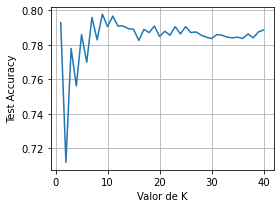

In [91]:
#Y graficamos los resultados 

plt.figure(figsize=(4,3))
plt.plot(k_range, scores)
plt.xlabel('Valor de K'); plt.ylabel('Test Accuracy')
plt.grid(); plt.show()

In [92]:
# La precision del test es muy volatil para valores de k entre 1 y 16, y luego comienza a convergere alrededor del 
# 80% de precision para valores de k de 17 en adelante

In [93]:
# Probamos cross validation

from sklearn.model_selection import cross_val_score, KFold

# Usamos cross validation con 4 folds
kf = KFold(n_splits=4, shuffle=True, random_state=12)

scores_para_df = []

for i in range(1, 41):
    
    # En cada iteración, instanciamos el modelo con un hiperparámetro distinto
    model = KNeighborsClassifier(n_neighbors=i)
    
    # cross_val_scores nos devuelve un array de 4 resultados,
    # uno por cada partición que hizo automáticamente CV
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
    
    # Para cada valor de n_neighbours, creamos un diccionario con el valor
    # de n_neighbours y la media de los scores
    dict_row_score = {'score_medio':np.mean(cv_scores), 'n_neighbors':i}
    
    # Guardamos cada uno en la lista de diccionarios
    scores_para_df.append(dict_row_score)

In [94]:
# Creamos el DataFrame a partir de la lista de diccionarios
df_scores = pd.DataFrame(scores_para_df)
df_scores.sort_values(by=['score_medio'],ascending=False).head(5)

,score_medio,n_neighbors
8,0.799771,9
6,0.799006,7
10,0.798529,11
14,0.797956,15
18,0.797382,19


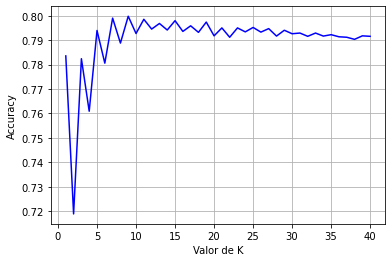

In [95]:
#Identificamos que el valor de n_neighbors que maximiza el score promedio es 7, con un score de 0.803.

#Grafiquemos la media por cada n_neighbors.
plt.plot(df_scores['n_neighbors'], df_scores['score_medio'], color='b')
plt.xlabel('Valor de K'); plt.ylabel('Accuracy')
plt.grid(); plt.show()

In [96]:
#Al aplicar cross validation notamos que, si bien la variabilidad de la precision en los valores iniciales se mantiene, esta vez
# se puede ver a simple viste que se alcanza un maximo en k=7 luego de converger a aproximadamente 0.795.

In [97]:
# Ahora estandarizamos las variables del detaset de entrenamiento de X para ver si cambian las conclusiones
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [98]:
print('Medias:', np.mean(X_train, axis=0).round(2))
print('Desvio:', np.std(X_train, axis=0).round(2))

Medias: [ 0.  0.  0. ... -0.  0.  0.]
Desvio: [1. 1. 1. ... 1. 1. 1.]


In [99]:
#Generamos un nuevo modelo KNN con los datos normalizados.

from sklearn.model_selection import cross_val_score, KFold

# Usamos cross validation con 4 folds
kf = KFold(n_splits=4, shuffle=True, random_state=12)

scores_para_df = []

for i in range(1, 41):
    
    # En cada iteración, instanciamos el modelo con un hiperparámetro distinto
    model = KNeighborsClassifier(n_neighbors=i)
    
    # cross_val_scores nos devuelve un array de 4 resultados,
    # uno por cada partición que hizo automáticamente CV
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
    
    # Para cada valor de n_neighbours, creamos un diccionario con el valor
    # de n_neighbours y la media de los scores
    dict_row_score = {'score_medio':np.mean(cv_scores), 'n_neighbors':i}
    
    # Guardamos cada uno en la lista de diccionarios
    scores_para_df.append(dict_row_score)

In [100]:
# Creamos el DataFrame a partir de la lista de diccionarios
df_scores = pd.DataFrame(scores_para_df)
df_scores.sort_values(by=['score_medio'],ascending=False).head(5)

,score_medio,n_neighbors
8,0.799580,9
6,0.799198,7
10,0.798911,11
14,0.798338,15
18,0.797669,19


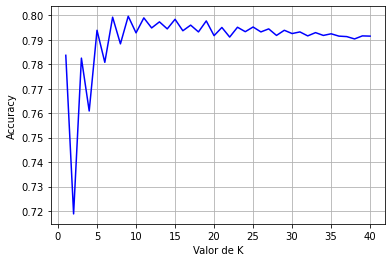

In [101]:
#Ahora el valor de n_neighbors que maximiza el score promedio es 9, pero el score empeoro levemente a 0.7997.

#Grafiquemos la media por cada n_neighbors.
plt.plot(df_scores['n_neighbors'], df_scores['score_medio'], color='b')
plt.xlabel('Valor de K'); plt.ylabel('Accuracy')
plt.grid(); plt.show()

In [102]:
#Ahora el valor de n_neighbors que maximiza el score promedio es 9, pero el score empeoro levemente a 0.7997. 
#Ademas ahora podemos notar una secuencia mas uniforme en lo que respecta al orden de los maximos segun su valor de k. 
#Con una presicion que varía fuertemente para los valores iniciales de k, hasta llegar a 9, para luego converger de forma 
#cada vez mas suave hacia una precision de 0.79.

<a id="evaluacion_modelos"></a>
## 5. Evaluación de los Modelos
---

Apartir de las diferentes metodologías y modelos predictivos, que parten de un misimo DataSet. Comenzaremos a realizar las evaluaciones de cada uno y el rendimiento que tienen. Analizando los hiperparamtetros y seleccionando el óptimo para cada condición.

<a id="section_matriz_confusion_code"></a> 
### 5.1 Métricas: Matriz de confusión

**Regresión Logística**

In [104]:
cm_lr = []

for i in range(0,11):
    cm_lr.append(confusion_matrix(y_test, y_pred_list_lr[i]))

sns.heatmap(cm_lr[2], annot=True, fmt='.0f')
plt.title('Matriz de Confusión')
plt.xlabel('Predichos')
plt.ylabel('Reales')

IndexError: list index out of range

**Neives-Bayes Gausiano**

In [44]:
# TO-DO

**K-Nearest Neighbors**

In [118]:
y_test.shape

(4487,)

<a id="section_accuracy"></a> 
### 5.2 Métricas: Accuracy

**Regresión Logística**

In [46]:
acc_lr = []
print(f'Accuaracy de la Regresión Logística:')
print('==================================================')
for i in range(0,10):
    acc_lr.append(accuracy_score(y_test, y_pred_list_lr[i]))
    print(f'Accuaracy thr=0.{i} = {round(acc_lr[i],3)*100} %')

Accuaracy de la Regresión Logística:
Accuaracy thr=0.0 = 78.7 %
Accuaracy thr=0.1 = 78.9 %
Accuaracy thr=0.2 = 79.0 %
Accuaracy thr=0.3 = 78.7 %
Accuaracy thr=0.4 = 78.4 %
Accuaracy thr=0.5 = 77.7 %
Accuaracy thr=0.6 = 75.9 %
Accuaracy thr=0.7 = 73.2 %
Accuaracy thr=0.8 = 63.6 %
Accuaracy thr=0.9 = 50.8 %


**Neives-Bayes Gausiano**

In [47]:
# TO-DO

**K-Nearest Neighbors**

<a id="section_error"></a> 
### 5.3 Métricas: Error de Clasificación

**Regresión Logística**

In [49]:
error_clasificación_lr = []
print(f'Error de Clasificación de la Regresión Logística:')
print('==================================================')
for i in range(0,10):
    error_clasificación_lr.append(1 - acc_lr[i])
    print(f'Error de clasificación thr=0.{i} = {round(error_clasificación_lr[i],2)*100} %')

Error de Clasificación de la Regresión Logística:
Error de clasificación thr=0.0 = 21.0 %
Error de clasificación thr=0.1 = 21.0 %
Error de clasificación thr=0.2 = 21.0 %
Error de clasificación thr=0.3 = 21.0 %
Error de clasificación thr=0.4 = 22.0 %
Error de clasificación thr=0.5 = 22.0 %
Error de clasificación thr=0.6 = 24.0 %
Error de clasificación thr=0.7 = 27.0 %
Error de clasificación thr=0.8 = 36.0 %
Error de clasificación thr=0.9 = 49.0 %


**Neives-Bayes Gausiano**

In [50]:
# TO-DO

**K-Nearest Neighbors**

In [51]:
# TO-DO

<a id="section_recall"></a> 
### 5.4 Métricas: Sensitivity (o recall)

**Regresión Logística**

In [52]:
recall_lr = []
print(f'Recall de la Regresión Logística:')
print('==================================================')
for i in range(0,10):
    recall_lr.append(recall_score(y_test, y_pred_list_lr[i]))
    print(f'Recall thr=0.{i} = {round(recall_lr[i],4)*100} %')

Recall de la Regresión Logística:
Recall thr=0.0 = 100.0 %
Recall thr=0.1 = 98.81 %
Recall thr=0.2 = 98.5 %
Recall thr=0.3 = 97.88 %
Recall thr=0.4 = 96.8 %
Recall thr=0.5 = 94.31 %
Recall thr=0.6 = 88.56 %
Recall thr=0.7 = 82.16 %
Recall thr=0.8 = 62.22 %
Recall thr=0.9 = 42.370000000000005 %


**Neives-Bayes Gausiano**

In [53]:
# TO-DO

**K-Nearest Neighbors**

In [54]:
# TO-DO

<a id="section_specificity"></a> 
### 5.5 Métricas: Specificity

**Regresión Logística**

In [55]:
specificity_lr = []
print(f'Specificity de la Regresión Logística:')
print('==================================================')
for i in range(0,10):

    TP = cm_lr[i][1, 1]
    TN = cm_lr[i][0, 0]
    FP = cm_lr[i][0, 1]
    FN = cm_lr[i][1, 0]

    specificity_lr.append(TN / (TN + FP))
    print(f'Specificity thr=0.{i} = {round(specificity_lr[i],3)*100} %')

Specificity de la Regresión Logística:
Specificity thr=0.0 = 0.0 %
Specificity thr=0.1 = 5.5 %
Specificity thr=0.2 = 6.800000000000001 %
Specificity thr=0.3 = 7.9 %
Specificity thr=0.4 = 10.4 %
Specificity thr=0.5 = 16.400000000000002 %
Specificity thr=0.6 = 29.2 %
Specificity thr=0.7 = 40.1 %
Specificity thr=0.8 = 68.5 %
Specificity thr=0.9 = 82.0 %


**Neives-Bayes Gausiano**

In [56]:
# TO-DO

**K-Nearest Neighbors**

In [57]:
# TO-DO

<a id="section_precision"></a> 
### 5.6 Métricas: Precision

**Regresión Logística**

In [58]:
precision_lr = []
print(f'Precisión de la Regresión Logística:')
print('==================================================')
for i in range(0,10):
    precision_lr.append(precision_score(y_test, y_pred_list_lr[i]))
    print(f'Precisión thr=0.{i} = {round(precision_lr[i],3)*100} %')

Precisión de la Regresión Logística:
Precisión thr=0.0 = 78.7 %
Precisión thr=0.1 = 79.4 %
Precisión thr=0.2 = 79.60000000000001 %
Precisión thr=0.3 = 79.7 %
Precisión thr=0.4 = 80.0 %
Precisión thr=0.5 = 80.60000000000001 %
Precisión thr=0.6 = 82.19999999999999 %
Precisión thr=0.7 = 83.5 %
Precisión thr=0.8 = 88.0 %
Precisión thr=0.9 = 89.7 %


**Neives-Bayes Gausiano**

In [59]:
# TO-DO

**K-Nearest Neighbors**

In [60]:
# TO-DO

<a id="section_fpr"></a> 
### 5.7 Métricas: False positive rate (FPR)

**Regresión Logística**

In [61]:
false_positive_lr = []
print(f'FPR de la Regresión Logística:')
print('==================================================')
for i in range(0,10):
    false_positive_lr.append(1 - specificity_lr[i])
    print(f'FPR thr=0.{i} = {round(false_positive_lr[i],4)*100} %')

FPR de la Regresión Logística:
FPR thr=0.0 = 100.0 %
FPR thr=0.1 = 94.46 %
FPR thr=0.2 = 93.2 %
FPR thr=0.3 = 92.05 %
FPR thr=0.4 = 89.64 %
FPR thr=0.5 = 83.58 %
FPR thr=0.6 = 70.82000000000001 %
FPR thr=0.7 = 59.940000000000005 %
FPR thr=0.8 = 31.490000000000002 %
FPR thr=0.9 = 17.990000000000002 %


**Neives-Bayes Gausiano**

In [62]:
# TO-DO

**K-Nearest Neighbors**

In [63]:
# TO-DO

<a id="section_f1_score"></a> 
### 5.8 Métricas: F1-Score

**Regresión Logística**

In [64]:
f1_score_lr = []
print(f'F1-Score de la Regresión Logística:')
print('==================================================')
for i in range(0,10):
    f1_score_lr.append(f1_score(y_test, y_pred_list_lr[i]))
    print(f'F1-Score thr=0.{i} = {round(f1_score_lr[i],4)*100} %')

F1-Score de la Regresión Logística:
F1-Score thr=0.0 = 88.08 %
F1-Score thr=0.1 = 88.07000000000001 %
F1-Score thr=0.2 = 88.05 %
F1-Score thr=0.3 = 87.86 %
F1-Score thr=0.4 = 87.57000000000001 %
F1-Score thr=0.5 = 86.95 %
F1-Score thr=0.6 = 85.26 %
F1-Score thr=0.7 = 82.83 %
F1-Score thr=0.8 = 72.88 %
F1-Score thr=0.9 = 57.550000000000004 %


**Neives-Bayes Gausiano**

In [65]:
# TO-DO

**K-Nearest Neighbors**

In [66]:
# TO-DO

<a id="section_curva_roc"></a> 
## 6. Curva ROC
---

In [67]:
# TO-DO

<a id="section_umbrales"></a> 
### 6.1 Ajustando los umbrales

In [68]:
fpr_log, tpr_log, thr_log = roc_curve(y_test, y_pred[:,1])

<a id="section_imp_croc"></a> 
### 6.2 Implementación Curva ROC y AUC

AUC de la Regresión Logística:
AUC = 0.6885


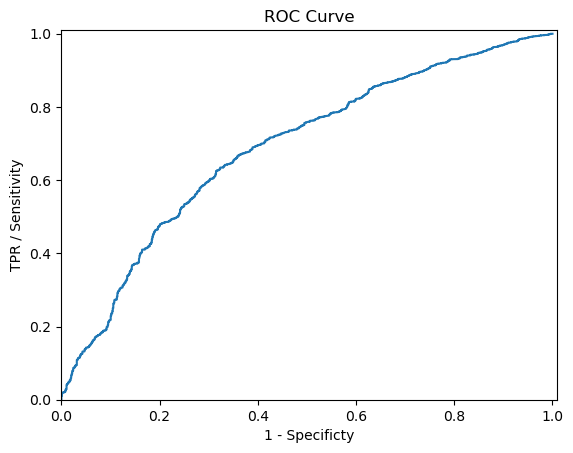

In [69]:
roc_curve_df_lr = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr=thr_log))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(roc_curve_df_lr['fpr'],roc_curve_df_lr['tpr'])

print(f'AUC de la Regresión Logística:')
print('==================================================')
auc_score = auc(fpr_log, tpr_log)
print(f'AUC = {round(auc_score,4)}')
# TO-DO ROC y AUC para KNN y NB

<a id="conclusiones"></a> 
## 7. Conclusiones
---

In [70]:
# TO-DO